<a href="https://colab.research.google.com/github/alexrafkin/ideal-parakeet/blob/main/DataExplorationI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

us_ed = pd.read_sql_query('select * from useducation',con=engine)
engine.dispose()

In [ ]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

years = us_ed["YEAR"].unique()

for col in fill_list:
    for year in years:
        us_ed.loc[us_ed["YEAR"] == year, col] = us_ed.loc[us_ed["YEAR"] == year, col].fillna(
            us_ed[us_ed["YEAR"] == year][col].mean())
for col in fill_list:
    us_ed.loc[:, col] = us_ed.loc[:, col].interpolate()        


1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [ ]:
us_ed.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.456000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.492000e+03,1.456000e+03,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1.492000e+03,1.492000e+03,1.492000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.107018e+05,9.153316e+06,7.750895e+05,4.244638e+06,4.133589e+06,9.265104e+06,4.792203e+06,2.699314e+06,4.281290e+05,9.160555e+05,17322.811386,60263.964904,60997.000598,60720.338343,51334.094208,4.906595e+05,2.335253e+05,7.829544e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,9.804669e+05,1.092021e+07,1.067734e+06,5.150863e+06,5.096356e+06,1.113642e+07,5.849160e+06,3.119208e+06,4.929789e+05,1.234628e+06,28402.501555,77885.354149,78025.727397,76736.594217,65994.411647,6.255796e+05,2.991176e+05,9.210614e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.973995e+05,2.546261e+06,2.170200e+05,1.356434e+06,9.447962e+05,2.523968e+06,1.343611e+06,7.673688e+05,1.279618e+05,2.163398e+05,2060.750000,10333.500000,10772.000000,10936.500000,9782.750000,8.638100e+04,4.236525e+04,1.842418e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,7.604805e+05,6.055223e+06,4.694965e+05,2.940125e+06,2.551996e+06,6.160492e+06,3.163640e+06,1.780190e+06,3.189561e+05,6.086485e+05,9119.500000,39882.000000,41408.000000,41139.500000,35227.500000,3.327785e+05,1.567610e+05,5.991710e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,9.491093e+05,1.156703e+07,9.308812e+05,5.310651e+06,5.179914e+06,1.178409e+07,6.004265e+06,3.443534e+06,5.223475e+05,1.057004e+06,22660.796296,70748.750000,72310.250000,72598.250000,65297.648148,5.783400e+05,2.843505e+05,8.841245e+05,241.995486,285.347428,223.999337,268.190121


Total revenue mean = 9 E6, while std = 1 E7, lots of high outliers
Same goes for other revenues & expenditures

2. Choose a state (such as California) and draw a line graph of its total revenues and total expenditures over the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

In [ ]:
cali = us_ed[us_ed["STATE"] == "CALIFORNIA"]

In [ ]:
cali

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,8.520926e+06,NaN,2.044688e+06,59067.000000,431763.000000,418418.0,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,NaN
56,1993_CALIFORNIA,CALIFORNIA,1993,5.129788e+06,2.804334e+07,2.151157e+06,1.706415e+07,8.828035e+06,2.811099e+07,1.528115e+07,8.914559e+06,1.608514e+06,1.944760e+06,59954.000000,444104.000000,420233.0,380223.000000,277271.00000,3.328627e+06,1.393530e+06,4.782111e+06,NaN,NaN,NaN,NaN
108,1994_CALIFORNIA,CALIFORNIA,1994,4.120498e+06,2.344084e+07,2.095878e+06,1.317555e+07,8.169417e+06,2.301269e+07,1.244386e+07,6.754346e+06,1.615630e+06,1.916061e+06,66450.000000,448237.000000,426919.0,388561.000000,285132.00000,3.372294e+06,1.421547e+06,4.860291e+06,NaN,NaN,NaN,NaN
161,1995_CALIFORNIA,CALIFORNIA,1995,5.299405e+06,2.951221e+07,2.612241e+06,1.554149e+07,1.135849e+07,3.009755e+07,1.614642e+07,8.603751e+06,2.181053e+06,2.669270e+06,69182.000000,472334.000000,428553.0,399039.000000,287428.00000,3.430751e+06,1.464841e+06,4.964774e+06,NaN,NaN,NaN,NaN
213,1996_CALIFORNIA,CALIFORNIA,1996,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,9.222569e+06,2.362407e+06,2.580639e+06,73233.000000,469965.000000,435217.0,406456.000000,298669.00000,3.516572e+06,1.525618e+06,5.115423e+06,209.129083,262.772478,201.912591,269.197451
264,1997_CALIFORNIA,CALIFORNIA,1997,5.595836e+06,3.561493e+07,2.850766e+06,2.056073e+07,1.220344e+07,3.386228e+07,1.816044e+07,1.004040e+07,1.792979e+06,3.088674e+06,76584.000000,463684.000000,451069.0,412604.000000,317595.00000,3.591033e+06,1.578929e+06,5.246546e+06,NaN,NaN,NaN,NaN
316,1998_CALIFORNIA,CALIFORNIA,1998,5.727224e+06,3.918302e+07,3.149260e+06,2.284050e+07,1.319326e+07,3.808767e+07,2.008391e+07,1.093906e+07,1.862674e+06,4.335730e+06,81926.000000,459262.000000,462241.0,424768.000000,334852.00000,3.666271e+06,1.627284e+06,5.375481e+06,NaN,NaN,NaN,NaN
367,1999_CALIFORNIA,CALIFORNIA,1999,5.839207e+06,4.139344e+07,3.599923e+06,2.369510e+07,1.409842e+07,4.083464e+07,2.111054e+07,1.153991e+07,1.954362e+06,4.738866e+06,85992.000000,459771.000000,489356.0,431730.000000,347914.00000,3.734997e+06,1.675778e+06,5.496767e+06,NaN,NaN,NaN,NaN
420,2000_CALIFORNIA,CALIFORNIA,2000,5.941946e+06,4.662821e+07,4.024940e+06,2.687792e+07,1.572535e+07,4.582975e+07,2.351439e+07,1.242907e+07,2.269603e+06,5.849441e+06,89919.000000,459771.000000,489043.0,441877.000000,357789.00000,3.804640e+06,1.707952e+06,5.602511e+06,213.565125,262.171027,205.916588,264.494066
472,2001_CALIFORNIA,CALIFORNIA,2001,6.045030e+06,5.328894e+07,4.280358e+06,3.137489e+07,1.763370e+07,5.208254e+07,2.664181e+07,1.412766e+07,2.570224e+06,6.755895e+06,100351.000000,457165.000000,485301.0,461133.000000,365907.00000,3.871843e+06,1.745295e+06,5.717489e+06,NaN,NaN,NaN,NaN


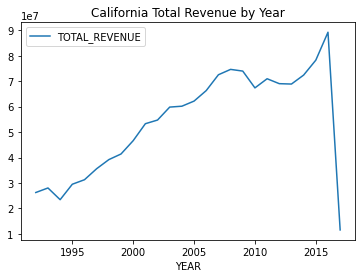

In [ ]:
cali.plot.line(x="YEAR", y="TOTAL_REVENUE")
plt.title("California Total Revenue by Year")
plt.show()

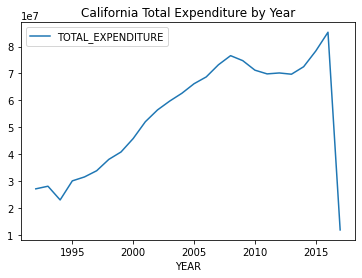

In [ ]:
cali.plot.line(x="YEAR", y="TOTAL_EXPENDITURE")
plt.title("California Total Expenditure by Year")
plt.show()

Generally trending upwards, there is a dip around 2008/2009 in both graphs, which makes sense since that's when there was a recession. Not sure whats going on in the 2017 data, huge drop off in both graphs.

3. In your chosen state, in which of the lessons are the students more successful—math or reading?

In [ ]:
cali_drop = cali.dropna()

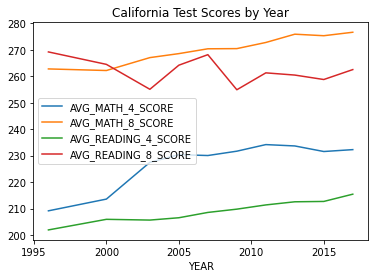

In [ ]:
cali_drop.plot.line(x="YEAR", y=["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"])
plt.title("California Test Scores by Year")
plt.show()

We can see California tends to do better in math than in reading.

4. What are the distributions of the math and reading scores in the sample?

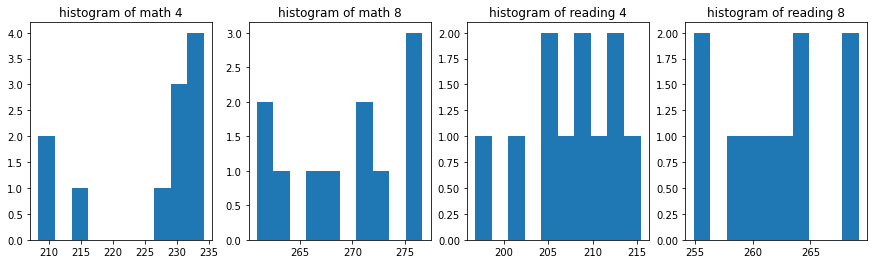

In [ ]:
plt.figure(figsize=(15,4))

# Histograms of the original data
plt.subplot(1, 4, 1)
plt.hist(cali["AVG_MATH_4_SCORE"])
plt.title("histogram of math 4")

plt.subplot(1, 4, 2)
plt.hist(cali["AVG_MATH_8_SCORE"])
plt.title("histogram of math 8")

plt.subplot(1, 4, 3)
plt.hist(cali["AVG_READING_4_SCORE"])
plt.title("histogram of reading 4")

plt.subplot(1, 4, 4)
plt.hist(cali["AVG_READING_8_SCORE"])
plt.title("histogram of reading 8")

plt.show()

These don't really look normally distributed to me, but there aren't a lot of data points.

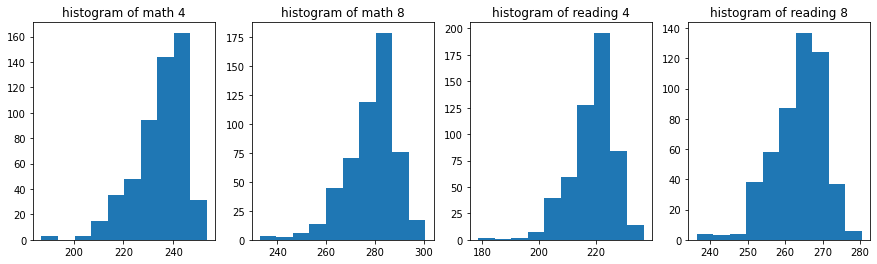

In [ ]:
plt.figure(figsize=(15,4))

# Histograms of the original data
plt.subplot(1, 4, 1)
plt.hist(us_ed["AVG_MATH_4_SCORE"])
plt.title("histogram of math 4")

plt.subplot(1, 4, 2)
plt.hist(us_ed["AVG_MATH_8_SCORE"])
plt.title("histogram of math 8")

plt.subplot(1, 4, 3)
plt.hist(us_ed["AVG_READING_4_SCORE"])
plt.title("histogram of reading 4")

plt.subplot(1, 4, 4)
plt.hist(us_ed["AVG_READING_8_SCORE"])
plt.title("histogram of reading 8")

plt.show()

This is for all states, which looks more normal but still slightly skewed left.

5. Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [ ]:
ed_mean = us_ed.copy()
ed_median = us_ed.copy()
ed_interpolate = us_ed.copy()

new_list = ["AVG_MATH_4_SCORE","AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

for col in new_list:
    ed_mean.loc[:, col] =  ed_mean.loc[:, col].fillna(ed_mean[col].mean())
    ed_median.loc[:, col] =  ed_median.loc[:, col].fillna(ed_median[col].median())    
    ed_interpolate.loc[:, col] = ed_interpolate.loc[:, col].interpolate()

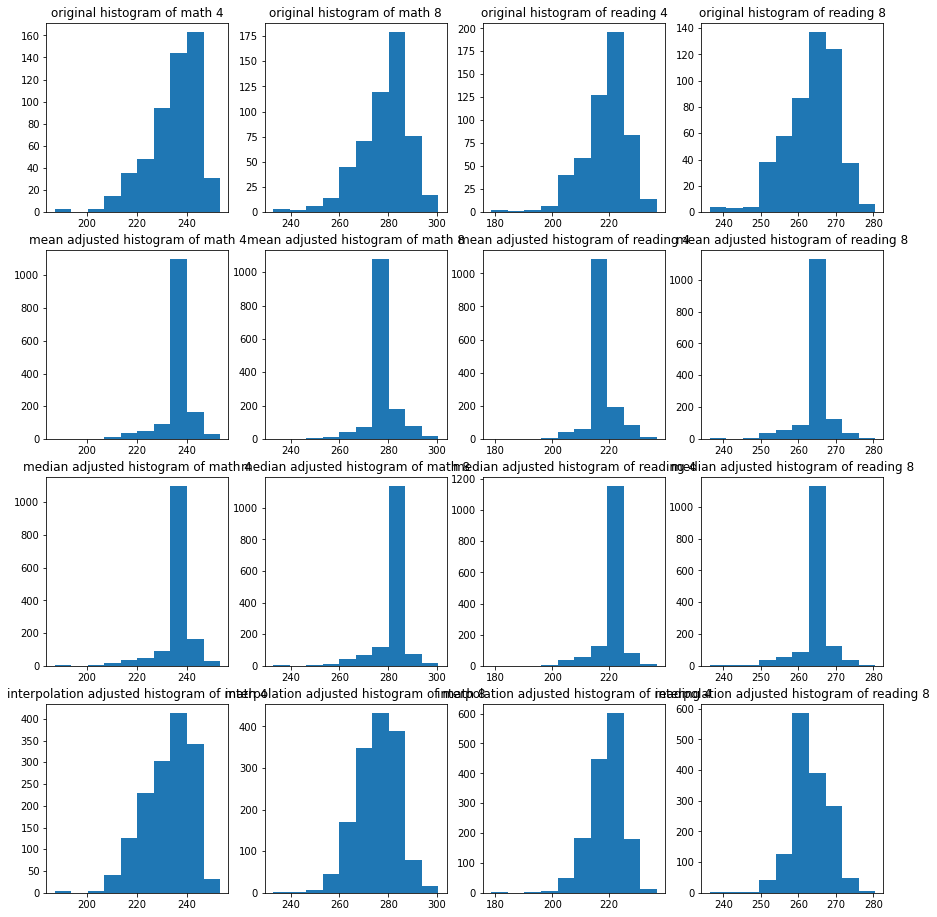

In [ ]:
plt.figure(figsize=(15,16))

# Histograms of the original data
plt.subplot(4, 4, 1)
plt.hist(us_ed["AVG_MATH_4_SCORE"])
plt.title("original histogram of math 4")

plt.subplot(4, 4, 2)
plt.hist(us_ed["AVG_MATH_8_SCORE"])
plt.title("original histogram of math 8")

plt.subplot(4, 4, 3)
plt.hist(us_ed["AVG_READING_4_SCORE"])
plt.title("original histogram of reading 4")

plt.subplot(4, 4, 4)
plt.hist(us_ed["AVG_READING_8_SCORE"])
plt.title("original histogram of reading 8")

#replaced w mean

plt.subplot(4, 4, 5)
plt.hist(ed_mean["AVG_MATH_4_SCORE"])
plt.title("mean adjusted histogram of math 4")

plt.subplot(4, 4, 6)
plt.hist(ed_mean["AVG_MATH_8_SCORE"])
plt.title("mean adjusted histogram of math 8")

plt.subplot(4, 4, 7)
plt.hist(ed_mean["AVG_READING_4_SCORE"])
plt.title("mean adjusted histogram of reading 4")

plt.subplot(4, 4, 8)
plt.hist(ed_mean["AVG_READING_8_SCORE"])
plt.title("mean adjusted histogram of reading 8")

#median

plt.subplot(4, 4, 9)
plt.hist(ed_median["AVG_MATH_4_SCORE"])
plt.title("median adjusted histogram of math 4")

plt.subplot(4, 4, 10)
plt.hist(ed_median["AVG_MATH_8_SCORE"])
plt.title("median adjusted histogram of math 8")

plt.subplot(4, 4, 11)
plt.hist(ed_median["AVG_READING_4_SCORE"])
plt.title("median adjusted histogram of reading 4")

plt.subplot(4, 4, 12)
plt.hist(ed_median["AVG_READING_8_SCORE"])
plt.title("median adjusted histogram of reading 8")

#interpolated

plt.subplot(4, 4, 13)
plt.hist(ed_interpolate["AVG_MATH_4_SCORE"])
plt.title("interpolation adjusted histogram of math 4")

plt.subplot(4, 4, 14)
plt.hist(ed_interpolate["AVG_MATH_8_SCORE"])
plt.title("interpolation adjusted histogram of math 8")

plt.subplot(4, 4, 15)
plt.hist(ed_interpolate["AVG_READING_4_SCORE"])
plt.title("interpolation adjusted histogram of reading 4")

plt.subplot(4, 4, 16)
plt.hist(ed_interpolate["AVG_READING_8_SCORE"])
plt.title("interpolation adjusted histogram of reading 8")

plt.show()

Since there were so many missing values, mean and median made the data really unrealistic, with huge disproportionate modes. Interpolation did much better.

In [ ]:
bystate = us_ed.groupby("STATE").sum()

In [ ]:
bystate["deficit"] = bystate["TOTAL_REVENUE"] - bystate["TOTAL_EXPENDITURE"]

In [ ]:
bystate.iloc[11]

YEAR                            5.211700e+04
ENROLL                          1.436171e+08
TOTAL_REVENUE                   1.406547e+09
FEDERAL_REVENUE                 1.457911e+08
STATE_REVENUE                   7.795428e+08
LOCAL_REVENUE                   4.812131e+08
TOTAL_EXPENDITURE               1.418073e+09
INSTRUCTION_EXPENDITURE         7.030787e+08
SUPPORT_SERVICES_EXPENDITURE    4.093736e+08
OTHER_EXPENDITURE               7.030203e+07
CAPITAL_OUTLAY_EXPENDITURE      1.552708e+08
GRADES_PK_G                     1.982785e+06
GRADES_KG_G                     1.123843e+07
GRADES_4_G                      1.115878e+07
GRADES_8_G                      1.083564e+07
GRADES_12_G                     9.601032e+06
GRADES_1_8_G                    8.892741e+07
GRADES_9_12_G                   4.286855e+07
GRADES_ALL_G                    1.296610e+08
AVG_MATH_4_SCORE                2.482256e+03
AVG_MATH_8_SCORE                2.962908e+03
AVG_READING_4_SCORE             2.287027e+03
AVG_READIN

In [ ]:
bystate.iloc[14]

YEAR                            5.211700e+04
ENROLL                          1.348404e+07
TOTAL_REVENUE                   1.986265e+08
FEDERAL_REVENUE                 9.725283e+06
STATE_REVENUE                   7.415027e+07
LOCAL_REVENUE                   1.147510e+08
TOTAL_EXPENDITURE               1.918229e+08
INSTRUCTION_EXPENDITURE         1.072820e+08
SUPPORT_SERVICES_EXPENDITURE    5.682928e+07
OTHER_EXPENDITURE               6.765873e+06
CAPITAL_OUTLAY_EXPENDITURE      1.256934e+07
GRADES_PK_G                     3.202410e+05
GRADES_KG_G                     9.921158e+05
GRADES_4_G                      1.014198e+06
GRADES_8_G                      9.982253e+05
GRADES_12_G                     8.643764e+05
GRADES_1_8_G                    8.114470e+06
GRADES_9_12_G                   3.841901e+06
GRADES_ALL_G                    1.309073e+07
AVG_MATH_4_SCORE                2.628529e+03
AVG_MATH_8_SCORE                3.111458e+03
AVG_READING_4_SCORE             2.507978e+03
AVG_READIN

In [ ]:
bystate.iloc[43]

YEAR                            5.211700e+04
ENROLL                          3.919669e+07
TOTAL_REVENUE                   4.334943e+08
FEDERAL_REVENUE                 3.433639e+07
STATE_REVENUE                   2.382668e+08
LOCAL_REVENUE                   1.608911e+08
TOTAL_EXPENDITURE               4.375326e+08
INSTRUCTION_EXPENDITURE         2.084367e+08
SUPPORT_SERVICES_EXPENDITURE    1.392686e+08
OTHER_EXPENDITURE               2.008105e+07
CAPITAL_OUTLAY_EXPENDITURE      3.709458e+07
GRADES_PK_G                     6.202313e+05
GRADES_KG_G                     3.019122e+06
GRADES_4_G                      2.926970e+06
GRADES_8_G                      2.975012e+06
GRADES_12_G                     2.591400e+06
GRADES_1_8_G                    2.365452e+07
GRADES_9_12_G                   1.171916e+07
GRADES_ALL_G                    3.680802e+07
AVG_MATH_4_SCORE                2.568808e+03
AVG_MATH_8_SCORE                3.049543e+03
AVG_READING_4_SCORE             2.180804e+03
AVG_READIN

In [ ]:
bystate.iloc[54]

YEAR                            5.211700e+04
ENROLL                          6.688526e+07
TOTAL_REVENUE                   1.071208e+09
FEDERAL_REVENUE                 6.591570e+07
STATE_REVENUE                   4.520882e+08
LOCAL_REVENUE                   5.532038e+08
TOTAL_EXPENDITURE               1.116906e+09
INSTRUCTION_EXPENDITURE         6.825961e+08
SUPPORT_SERVICES_EXPENDITURE    2.753366e+08
OTHER_EXPENDITURE               2.994907e+07
CAPITAL_OUTLAY_EXPENDITURE      9.345525e+07
GRADES_PK_G                     1.035907e+06
GRADES_KG_G                     4.748323e+06
GRADES_4_G                      4.863773e+06
GRADES_8_G                      4.868134e+06
GRADES_12_G                     4.019874e+06
GRADES_1_8_G                    3.934070e+07
GRADES_9_12_G                   1.937591e+07
GRADES_ALL_G                    6.056663e+07
AVG_MATH_4_SCORE                2.575142e+03
AVG_MATH_8_SCORE                3.059138e+03
AVG_READING_4_SCORE             2.433807e+03
AVG_READIN

In [ ]:
us2 = us_ed.copy()
us2.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
209,1996_ALABAMA,ALABAMA,1996,7.359120e+05,3.365113e+06,3.348580e+05,2.138717e+06,8.915380e+05,3.572283e+06,1.987018e+06,9.351150e+05,3.228830e+05,2.866990e+05,9633.000000,60949.0,57098.0,58305.0,42510.0,469370.0,207980.0,6.869830e+05,211.646974,256.594863,210.920767,260.276441
211,1996_ARIZONA,ARIZONA,1996,7.646810e+05,4.143304e+06,3.789170e+05,1.798363e+06,1.966024e+06,4.391555e+06,1.860007e+06,1.193260e+06,2.206500e+05,8.771900e+05,4495.000000,64613.0,62793.0,60514.0,42041.0,511925.0,210289.0,7.267090e+05,217.575940,267.874834,206.529788,263.283638
212,1996_ARKANSAS,ARKANSAS,1996,4.529070e+05,2.183384e+06,1.921520e+05,1.296247e+06,6.949850e+05,2.297381e+06,1.264275e+06,6.361060e+05,1.270070e+05,2.035550e+05,1980.000000,36442.0,33855.0,37064.0,27613.0,283883.0,131997.0,4.178600e+05,215.846436,261.652745,208.837716,271.834590
213,1996_CALIFORNIA,CALIFORNIA,1996,5.460484e+06,3.128298e+07,2.603882e+06,1.706147e+07,1.161762e+07,3.156169e+07,1.688073e+07,9.222569e+06,2.362407e+06,2.580639e+06,73233.000000,469965.0,435217.0,406456.0,298669.0,3516572.0,1525618.0,5.115423e+06,209.129083,262.772478,201.912591,269.197451
214,1996_COLORADO,COLORADO,1996,6.556790e+05,3.891203e+06,1.949980e+05,1.664676e+06,2.031529e+06,4.075165e+06,2.052264e+06,1.127563e+06,1.437670e+05,5.882090e+05,12520.000000,50707.0,52524.0,52269.0,37179.0,423510.0,185700.0,6.217300e+05,225.805858,275.608214,221.653243,268.168154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,9.289047e+05,1.156703e+07,1.076461e+06,5.310651e+06,5.179914e+06,1.187645e+07,6.004265e+06,3.443534e+06,5.223475e+05,1.309819e+06,22660.796296,1006.0,1212.0,1103.0,1024.0,9403.0,5084.0,8.512614e+05,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,9.289047e+05,1.156703e+07,1.076461e+06,5.310651e+06,5.179914e+06,1.187645e+07,6.004265e+06,3.443534e+06,5.223475e+05,1.309819e+06,22660.796296,1006.0,1212.0,1103.0,1024.0,9403.0,5084.0,8.512614e+05,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,9.289047e+05,1.156703e+07,1.076461e+06,5.310651e+06,5.179914e+06,1.187645e+07,6.004265e+06,3.443534e+06,5.223475e+05,1.309819e+06,22660.796296,1006.0,1212.0,1103.0,1024.0,9403.0,5084.0,8.512614e+05,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,9.289047e+05,1.156703e+07,1.076461e+06,5.310651e+06,5.179914e+06,1.187645e+07,6.004265e+06,3.443534e+06,5.223475e+05,1.309819e+06,22660.796296,1006.0,1212.0,1103.0,1024.0,9403.0,5084.0,8.512614e+05,240.389213,288.143144,219.612694,258.700304


Text(0.5, 1.0, 'original null-dropped histogram of math 8')

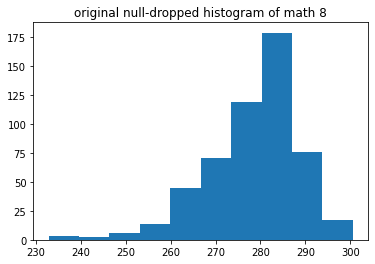

In [ ]:
plt.hist(us2["AVG_MATH_8_SCORE"])
plt.title("original null-dropped histogram of math 8")